# **UTS**

# **1. Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM**

## **Load Data**

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('Berita.csv')

# read data
print("Dataset Shape :", df.shape)
print("\nDataset info:")
df.info()

df.head(10)

Dataset Shape : (1500, 6)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        1500 non-null   int64 
 1   judul     1500 non-null   object
 2   berita    1500 non-null   object
 3   tanggal   1500 non-null   object
 4   kategori  1500 non-null   object
 5   link      1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
5,6,AHY Buka-bukaan Nasib Kelanjutan Pembangunan I...,Menko Bidang Infrastruktur dan Pembangunan Kew...,"Minggu, 01 Des 2024 18:20 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
6,7,Badan Gizi Soal Biaya Makan Gratis Rp10 Ribu: ...,Kepala Badan Gizi Nasional Dadan Hindayana men...,"Senin, 02 Des 2024 21:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412022...
7,8,Zulhas Minta Tambahan Anggaran Rp510 M Demi Ca...,Menteri Koordinator Bidang Pangan Zulkifli Has...,"Senin, 02 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...
8,9,PLN Akan Uji Coba PLTS IKN 22 Desember,Uji coba alias commissioning pembangkit listri...,"Senin, 02 Des 2024 20:20 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...
9,10,"Profil Jhony Saputra, Anak Haji Isam yang Jadi...",Anak crazy rich pengusaha sawit Kalimantan Sam...,"Senin, 02 Des 2024 20:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...


## **Preposesing**

In [ ]:
# Fungsi cleaning text
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if pd.isna(text):  # cek NaN
        return ''
    text = text.lower()  # Huruf kecil
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = re.sub(r'\W', ' ', text)  # Hapus karakter khusus selain huruf/angka
    text = BeautifulSoup(text, "html.parser").get_text()  # Hapus tag HTML
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

# contoh baca dataset
df = pd.read_csv('Berita.csv')

# terapkan ke kolom berita
df['preposesing'] = df['berita'].apply(clean_text)

df.head(5)

,No,judul,berita,tanggal,kategori,link,preposesing
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,menteri koordinator menko bidang perekonomian ...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,dalam rangka memeriahkan hari jadi ke pt surab...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,wacana presiden prabowo subianto akan membentu...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,bpjs ketenagakerjaan dan kementerian agama kem...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,pemerintah akan segera membentuk satuan tugas ...


In [ ]:
# Fungsi untuk melakukan tokenisasi
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

# terapkan ke kolom Preposesing
df['preposesing'] = df['preposesing'].apply(tokenize_text)

df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,No,judul,berita,tanggal,kategori,link,preposesing
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,"[menteri, koordinator, menko, bidang, perekono..."
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,"[dalam, rangka, memeriahkan, hari, jadi, ke, p..."
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[wacana, presiden, prabowo, subianto, akan, me..."
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[bpjs, ketenagakerjaan, dan, kementerian, agam..."
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[pemerintah, akan, segera, membentuk, satuan, ..."


In [ ]:
# Fungsi untuk melakukan stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

# Dapatkan Stop Word bahasa Indonesia
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

# terapkan ke kolom Preposesing
df['preposesing'] = df['preposesing'].apply(remove_stopwords)

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,No,judul,berita,tanggal,kategori,link,preposesing
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,"[menteri, koordinator, menko, bidang, perekono..."
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...,"[rangka, memeriahkan, pt, surabaya, industrial..."
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[wacana, presiden, prabowo, subianto, membentu..."
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[bpjs, ketenagakerjaan, kementerian, agama, ke..."
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...,"[pemerintah, membentuk, satuan, tugas, pemutus..."


In [ ]:
# Gabungkan semua token setelah stopword removal menjadi satu daftar
all_words_after_stopwords = [word for tokens in df['preposesing'] for word in tokens]

# Hitung frekuensi setiap kata
word_frequencies = Counter(all_words_after_stopwords)

# Menampilkan kata-kata yang paling umum dan frekuensinya
print("Top Most Frequent Words (Without Stemming):")
for word, frequency in word_frequencies.most_common(20): # Menampilkan 20 kata teratas
    print(f"{word}: {frequency}")

Top Most Frequent Words (Without Stemming):
indonesia: 2312
cnn: 1249
laut: 1109
presiden: 1041
rp: 1021
orang: 926
negara: 918
israel: 907
timnas: 891
persen: 883
pagar: 852
menteri: 820
pemerintah: 813
jakarta: 809
pemain: 791
piala: 753
warga: 701
prabowo: 690
tim: 682
gambasvideo: 670


In [ ]:
# Buat DataFrame baru dengan isi berita asli, hasil preprocessing, dan kategori
processed_df = df[['berita', 'preposesing', 'kategori']].copy()

# Konversi frekuensi kata ke DataFrame
frequency_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
frequency_df.index.name = 'word'
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)

# Simpan ke dua file CSV terpisah
processed_df.to_csv('hasil_preprocessing_berita.csv', index=False, encoding='utf-8')
frequency_df.to_csv('frekuensi_kata_berita.csv', encoding='utf-8')

print("Hasil preprocessing disimpan di 'hasil_preprocessing_berita.csv'")
print("Frekuensi kata disimpan di 'frekuensi_kata_berita.csv'")

Hasil preprocessing disimpan di 'hasil_preprocessing_berita.csv'
Frekuensi kata disimpan di 'frekuensi_kata_berita.csv'


In [ ]:
hasil_preprocessing = "hasil_preprocessing_berita.csv"
df = pd.read_csv(hasil_preprocessing)

# Tampilkan data
df

,berita,preposesing,kategori
0,Menteri Koordinator (Menko) Bidang Perekonomia...,"['menteri', 'koordinator', 'menko', 'bidang', ...",Ekonomi
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","['rangka', 'memeriahkan', 'pt', 'surabaya', 'i...",Ekonomi
2,Wacana Presiden Prabowo Subianto akan membentu...,"['wacana', 'presiden', 'prabowo', 'subianto', ...",Ekonomi
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"['bpjs', 'ketenagakerjaan', 'kementerian', 'ag...",Ekonomi
4,Pemerintah akan segera membentuk Satuan Tugas ...,"['pemerintah', 'membentuk', 'satuan', 'tugas',...",Ekonomi
...,...,...,...
1495,Anggota Dewan Keselamatan Transportasi Nasiona...,"['anggota', 'dewan', 'keselamatan', 'transport...",Internasional
1496,Israel telah membebaskan 110 tahanan Palestina...,"['israel', 'membebaskan', 'tahanan', 'palestin...",Internasional
1497,Hamas mengonfirmasi kematian kepala militernya...,"['hamas', 'mengonfirmasi', 'kematian', 'kepala...",Internasional
1498,Tim penyelam diduga menemukan satu dari dua bl...,"['tim', 'penyelam', 'diduga', 'menemukan', 'bl...",Internasional


In [ ]:
frekuensi_kata = "frekuensi_kata_berita.csv"
df = pd.read_csv(frekuensi_kata)

# Tampilkan data
df

,word,frequency
0,indonesia,2312
1,cnn,1249
2,laut,1109
3,presiden,1041
4,rp,1021
...,...,...
37087,dekadeceo,1
37088,redaksikecelakaan,1
37089,sebelumnyapilihan,1
37090,trumpdan,1


## **Ekstraksi Fitur**

In [ ]:
# Memuat Dataset
import pandas as pd

# Load data
df = pd.read_csv('hasil_preprocessing_berita.csv')

# read data
print("Dataset Shape :", df.shape)
print("\nDataset info:")
df.info()

df.head(10)

Dataset Shape : (1500, 3)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   berita       1500 non-null   object
 1   preposesing  1500 non-null   object
 2   kategori     1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB


,berita,preposesing,kategori
0,Menteri Koordinator (Menko) Bidang Perekonomia...,"['menteri', 'koordinator', 'menko', 'bidang', ...",Ekonomi
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","['rangka', 'memeriahkan', 'pt', 'surabaya', 'i...",Ekonomi
2,Wacana Presiden Prabowo Subianto akan membentu...,"['wacana', 'presiden', 'prabowo', 'subianto', ...",Ekonomi
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"['bpjs', 'ketenagakerjaan', 'kementerian', 'ag...",Ekonomi
4,Pemerintah akan segera membentuk Satuan Tugas ...,"['pemerintah', 'membentuk', 'satuan', 'tugas',...",Ekonomi
5,Menko Bidang Infrastruktur dan Pembangunan Kew...,"['menko', 'bidang', 'infrastruktur', 'pembangu...",Ekonomi
6,Kepala Badan Gizi Nasional Dadan Hindayana men...,"['kepala', 'badan', 'gizi', 'nasional', 'dadan...",Ekonomi
7,Menteri Koordinator Bidang Pangan Zulkifli Has...,"['menteri', 'koordinator', 'bidang', 'pangan',...",Ekonomi
8,Uji coba alias commissioning pembangkit listri...,"['uji', 'coba', 'alias', 'commissioning', 'pem...",Ekonomi
9,Anak crazy rich pengusaha sawit Kalimantan Sam...,"['anak', 'crazy', 'rich', 'pengusaha', 'sawit'...",Ekonomi


In [ ]:
!pip install gensim


Kamus dibuat dan difilter. Jumlah kata unik: 2509

--- Menjalankan HDP untuk estimasi jumlah topik... ---


✅ HDP mengestimasi ada sekitar: 20 topik.

--- Menjalankan pencarian koherensi dari 5 hingga 40 topik... ---
Selesai menghitung untuk 5 topik...
Selesai menghitung untuk 10 topik...
Selesai menghitung untuk 15 topik...
Selesai menghitung untuk 20 topik...
Selesai menghitung untuk 25 topik...
Selesai menghitung untuk 30 topik...
Selesai menghitung untuk 35 topik...

Total waktu pencarian koherensi: 4.87 menit


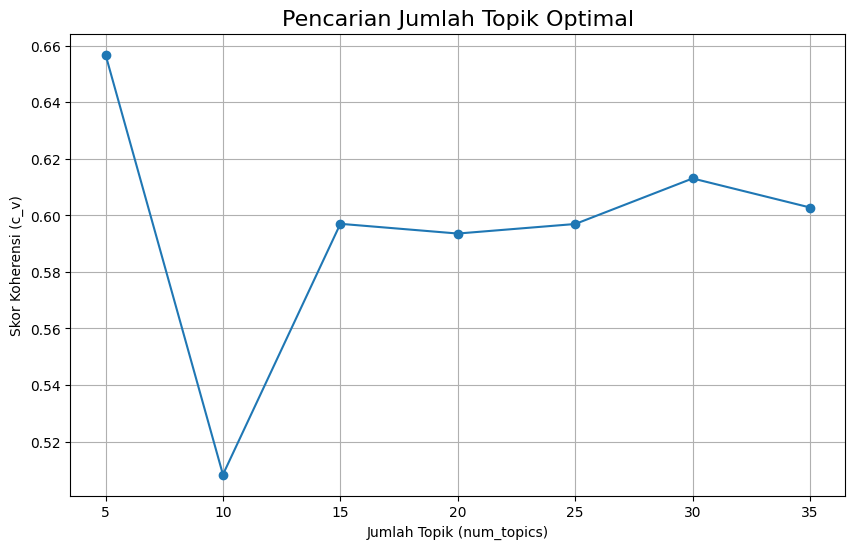


✅ Jumlah topik optimal yang ditemukan: 5

--- Melatih model LDA final dengan topik optimal... ---

--- Topik-topik yang Ditemukan oleh Model LDA ---
Topik: 0
Kata-kata: 0.017*"'rp'," + 0.016*"'persen'," + 0.011*"'prabowo'," + 0.011*"'program'," + 0.010*"'indonesia'," + 0.009*"'pemerintah'," + 0.009*"'jakarta'," + 0.007*"'ppn'," + 0.007*"'juta'," + 0.007*"'presiden'," + 0.007*"'masyarakat'," + 0.007*"'makan'," + 0.006*"'harga'," + 0.005*"'pajak'," + 0.005*"'bergizi',"

Topik: 1
Kata-kata: 0.017*"'korban'," + 0.014*"'kebakaran'," + 0.013*"'orang'," + 0.010*"'warga'," + 0.009*"'air'," + 0.009*"'rumah'," + 0.009*"'banjir'," + 0.008*"'pesawat'," + 0.008*"'los'," + 0.008*"'angeles'," + 0.007*"'jalan'," + 0.007*"'kota'," + 0.007*"'api'," + 0.007*"'wilayah'," + 0.006*"'mobil',"

Topik: 2
Kata-kata: 0.029*"'indonesia'," + 0.019*"'timnas'," + 0.017*"'pemain'," + 0.016*"'piala'," + 0.012*"'gol'," + 0.012*"'menit'," + 0.010*"'laga'," + 0.010*"'pelatih'," + 0.010*"'liga'," + 0.009*"'tim'," + 0.009

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, HdpModel
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

# Siapkan data untuk Gensim
documents = df['preposesing'].apply(lambda x: x.split()).tolist()
dictionary = Dictionary(documents)

# Filter Kamus (Sesuai Referensi & Praktik Terbaik) ---
# Membuang kata yang terlalu jarang atau terlalu sering muncul.
# Ini meningkatkan kualitas topik secara signifikan.
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"\nKamus dibuat dan difilter. Jumlah kata unik: {len(dictionary)}")


# Estimasi Jumlah Topik dengan HDP (Langkah Cerdas) ---
print("\n--- Menjalankan HDP untuk estimasi jumlah topik... ---")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
estimated_num_topics = len(hdp_model.print_topics())
print(f"✅ HDP mengestimasi ada sekitar: {estimated_num_topics} topik.")


# Mencari Jumlah Topik Terbaik dengan Plot Koherensi ---
def compute_coherence_values_multicore(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    start_time = time.time()
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, workers=3)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Selesai menghitung untuk {num_topics} topik...")
    total_time = time.time() - start_time
    print(f"\nTotal waktu pencarian koherensi: {total_time/60:.2f} menit")
    return coherence_values

# Atur rentang pencarian di sekitar hasil HDP
search_start = max(2, estimated_num_topics - 15)
search_limit = estimated_num_topics + 20
search_step = 5

print(f"\n--- Menjalankan pencarian koherensi dari {search_start} hingga {search_limit} topik... ---")
coherence_values = compute_coherence_values_multicore(dictionary=dictionary, corpus=corpus, texts=documents,
                                                    start=search_start, limit=search_limit, step=search_step)

# Tampilkan grafik
x = range(search_start, search_limit, search_step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.title("Pencarian Jumlah Topik Optimal", fontsize=16)
plt.xlabel("Jumlah Topik (num_topics)")
plt.ylabel("Skor Koherensi (c_v)")
plt.xticks(x)
plt.grid(True)
plt.show()

# Pilih jumlah topik terbaik (yang memiliki skor koherensi tertinggi)
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"\n✅ Jumlah topik optimal yang ditemukan: {optimal_num_topics}")


# Latih Model LDA Final & Ekstrak Fitur ---
print("\n--- Melatih model LDA final dengan topik optimal... ---")
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,
                         random_state=42, passes=15)

print("\n--- Topik-topik yang Ditemukan oleh Model LDA ---")
    # Tampilkan 15 kata teratas untuk setiap topik
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topik: {idx}")
    print(f"Kata-kata: {topic}\n")

# Ekstrak fitur (distribusi topik) untuk setiap dokumen
def get_lda_features(lda_model, bow_corpus):
    features = []
    for doc_bow in bow_corpus:
        topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_features = [0.0] * optimal_num_topics
        for topic_id, prob in topic_distribution:
            doc_features[topic_id] = prob
        features.append(doc_features)
    return np.array(features)

X = get_lda_features(lda_model, corpus)
y = df['kategori'].values

print("Ekstraksi fitur LDA selesai.")
print(f"Bentuk matriks fitur (X): {X.shape}")

## **Modeling dan Evaluasi**

**SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Bagi Data menjadi Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi. Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")


# Latih Model Klasifikasi (SVM)
classifier = SVC(kernel='linear', random_state=42, probability=True)
classifier.fit(X_train, y_train)

# Evaluasi Kinerja Model
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- HASIL EVALUASI (SVM) ---")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred))


Data dibagi. Jumlah data latih: 1200, Jumlah data uji: 300

--- HASIL EVALUASI AKHIR ---
Akurasi Model: 76.33%

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

      Ekonomi       0.77      0.96      0.85        75
Internasional       0.73      0.61      0.67        75
     Nasional       0.54      0.49      0.51        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.76       300
    macro avg       0.76      0.76      0.76       300
 weighted avg       0.76      0.76      0.76       300



**Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Bagi Data menjadi Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi. Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

classifier_nb = MultinomialNB()
print("\nMemulai pelatihan model Naive Bayes...")
classifier_nb.fit(X_train, y_train)
print("Pelatihan selesai.")

y_pred_nb = classifier_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("\n--- HASIL EVALUASI (NAIVE BAYES) ---")
print(f"Akurasi Model: {accuracy_nb * 100:.2f}%")
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred_nb, zero_division=0))


Data dibagi. Jumlah data latih: 1200, Jumlah data uji: 300

Memulai pelatihan model Naive Bayes...
Pelatihan selesai.

--- HASIL EVALUASI (NAIVE BAYES) ---
Akurasi Model: 76.67%

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

      Ekonomi       0.77      0.95      0.85        75
Internasional       0.73      0.64      0.68        75
     Nasional       0.54      0.49      0.52        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.77       300
    macro avg       0.76      0.77      0.76       300
 weighted avg       0.76      0.77      0.76       300



# **2. Lakukan analisa clutering dokumen pada data email**

## **Load Data**

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('spam.csv', encoding='latin1')

# read data
print("Dataset Shape :", df.shape)
print("\nDataset info:")
df.info()

df.head(10)

Dataset Shape : (5572, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5572 non-null   int64 
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,6,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,7,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,8,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,9,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,10,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## **Preposesing**

In [ ]:
# Fungsi cleaning text
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if pd.isna(text):  # cek NaN
        return ''
    text = text.lower()  # Huruf kecil
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = re.sub(r'\W', ' ', text)  # Hapus karakter khusus selain huruf/angka
    text = BeautifulSoup(text, "html.parser").get_text()  # Hapus tag HTML
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

# contoh baca dataset
df = pd.read_csv('spam.csv', encoding='latin1')

# terapkan ke kolom berita
df['preposesing'] = df['Text'].apply(clean_text)

df.head(5)

,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,preposesing
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go until jurong point crazy available only in ...
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry in a wkly comp to win fa cup final ...
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say so early hor u c already then say
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah i dont think he goes to usf he lives aroun...


In [ ]:
# Fungsi untuk melakukan tokenisasi
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

# terapkan ke kolom Preposesing
df['preposesing'] = df['preposesing'].apply(tokenize_text)

df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,preposesing
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"[go, until, jurong, point, crazy, available, o..."
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN,"[ok, lar, joking, wif, u, oni]"
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN,"[u, dun, say, so, early, hor, u, c, already, t..."
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [ ]:
# Fungsi untuk melakukan stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

# Dapatkan Stop Word bahasa Indonesia
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

# terapkan ke kolom Preposesing
df['preposesing'] = df['preposesing'].apply(remove_stopwords)

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,preposesing
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"[go, until, jurong, point, crazy, available, o..."
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN,"[ok, lar, joking, wif, u, oni]"
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN,"[u, dun, say, so, early, hor, u, c, already, t..."
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"[i, dont, think, he, goes, to, usf, he, lives,..."


In [ ]:
# Gabungkan semua token setelah stopword removal menjadi satu daftar
all_words_after_stopwords = [word for tokens in df['preposesing'] for word in tokens]

# Hitung frekuensi setiap kata
word_frequencies = Counter(all_words_after_stopwords)

# Menampilkan kata-kata yang paling umum dan frekuensinya
print("Top Most Frequent Words (Without Stemming):")
for word, frequency in word_frequencies.most_common(20): # Menampilkan 20 kata teratas
    print(f"{word}: {frequency}")

Top Most Frequent Words (Without Stemming):
i: 2250
to: 2240
you: 2125
a: 1432
the: 1323
u: 1144
and: 970
in: 887
is: 886
me: 797
my: 754
for: 704
your: 677
it: 621
of: 619
call: 579
have: 573
on: 535
that: 515
are: 489


In [ ]:
# Buat DataFrame baru dengan isi berita asli, hasil preprocessing, dan kategori
processed_df = df[['Text', 'preposesing']].copy()

# Konversi frekuensi kata ke DataFrame
frequency_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
frequency_df.index.name = 'word'
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)

# Simpan ke dua file CSV terpisah
processed_df.to_csv('hasil_preprocessing_spam.csv', index=False, encoding='utf-8')
frequency_df.to_csv('frekuensi_kata_spam.csv', encoding='utf-8')

print("Hasil preprocessing disimpan di 'hasil_preprocessing_emailUTS.csv'")
print("Frekuensi kata disimpan di 'frekuensi_kata_emailUTS.csv'")

Hasil preprocessing disimpan di 'hasil_preprocessing_emailUTS.csv'
Frekuensi kata disimpan di 'frekuensi_kata_emailUTS.csv'


In [ ]:
import pandas as pd

df = pd.read_csv('hasil_preprocessing_spam.csv')

# Tampilkan data
df

,Text,preposesing
0,"Go until jurong point, crazy.. Available only ...","['go', 'until', 'jurong', 'point', 'crazy', 'a..."
1,Ok lar... Joking wif u oni...,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"['free', 'entry', 'in', 'a', 'wkly', 'comp', '..."
3,U dun say so early hor... U c already then say...,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',..."
4,"Nah I don't think he goes to usf, he lives aro...","['i', 'dont', 'think', 'he', 'goes', 'to', 'us..."
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"['this', 'is', 'the', 'nd', 'time', 'we', 'hav..."
5568,Will Ì_ b going to esplanade fr home?,"['will', 'ì', 'b', 'going', 'to', 'esplanade',..."
5569,"Pity, * was in mood for that. So...any other s...","['pity', 'was', 'in', 'mood', 'for', 'that', '..."
5570,The guy did some bitching but I acted like i'd...,"['the', 'guy', 'did', 'some', 'bitching', 'but..."


In [ ]:
import pandas as pd

df = pd.read_csv('frekuensi_kata_spam.csv')

# Tampilkan data
df

,word,frequency
0,i,2250
1,to,2240
2,you,2125
3,a,1432
4,the,1323
...,...,...
8573,surrounded,1
8574,cakes,1
8575,cuck,1
8576,weeddeficient,1


## **Ekstaksi Fitur**

In [ ]:
# Memuat Dataset
import pandas as pd

# Load data
df = pd.read_csv('hasil_preprocessing_spam.csv')

# read data
print("Dataset Shape :", df.shape)
print("\nDataset info:")
df.info()

df.head(10)

Dataset Shape : (5572, 2)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         5572 non-null   object
 1   preposesing  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,Text,preposesing
0,"Go until jurong point, crazy.. Available only ...","['go', 'until', 'jurong', 'point', 'crazy', 'a..."
1,Ok lar... Joking wif u oni...,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"['free', 'entry', 'in', 'a', 'wkly', 'comp', '..."
3,U dun say so early hor... U c already then say...,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',..."
4,"Nah I don't think he goes to usf, he lives aro...","['i', 'dont', 'think', 'he', 'goes', 'to', 'us..."
5,FreeMsg Hey there darling it's been 3 week's n...,"['freemsg', 'hey', 'there', 'darling', 'its', ..."
6,Even my brother is not like to speak with me. ...,"['even', 'my', 'brother', 'is', 'not', 'like',..."
7,As per your request 'Melle Melle (Oru Minnamin...,"['as', 'your', 'request', 'melle', 'melle', 'o..."
8,WINNER!! As a valued network customer you have...,"['winner', 'as', 'a', 'valued', 'network', 'cu..."
9,Had your mobile 11 months or more? U R entitle...,"['had', 'your', 'mobile', 'months', 'or', 'mor..."


In [ ]:
!pip install gensim


Kamus dibuat dan difilter. Jumlah kata unik: 758

--- Menjalankan HDP untuk estimasi jumlah topik... ---


✅ HDP mengestimasi ada sekitar: 20 topik.

--- Menjalankan pencarian koherensi dari 5 hingga 40 topik... ---
Selesai menghitung untuk 5 topik. Skor Koherensi: 0.5230
Selesai menghitung untuk 10 topik. Skor Koherensi: 0.5234
Selesai menghitung untuk 15 topik. Skor Koherensi: 0.5171
Selesai menghitung untuk 20 topik. Skor Koherensi: 0.5207
Selesai menghitung untuk 25 topik. Skor Koherensi: 0.4815
Selesai menghitung untuk 30 topik. Skor Koherensi: 0.4761
Selesai menghitung untuk 35 topik. Skor Koherensi: 0.4443

Total waktu pencarian koherensi: 4.05 menit


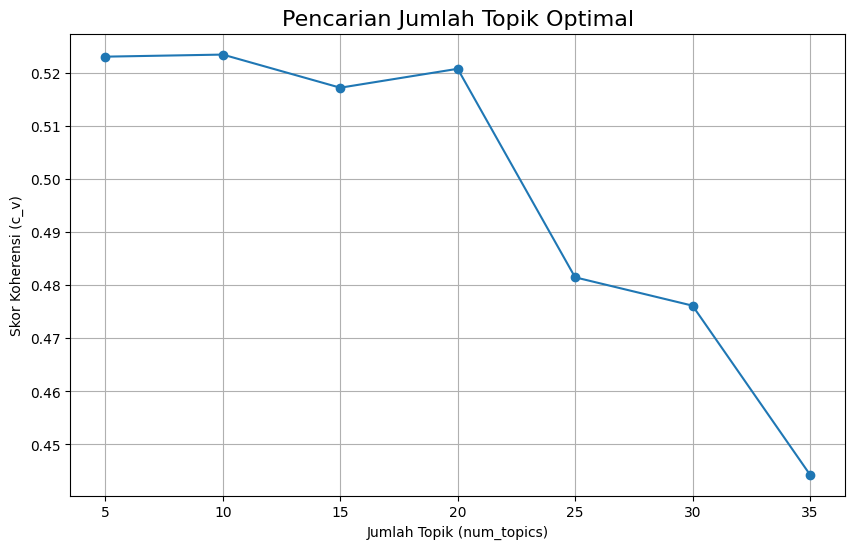


✅ Jumlah topik optimal yang ditemukan: 10

--- Melatih model LDA final dengan topik optimal... ---

--- Topik-topik yang Ditemukan oleh Model LDA ---
Topik: 0
Kata-kata: 0.045*"'the'," + 0.036*"'ur'," + 0.034*"'in'," + 0.024*"'is'," + 0.024*"'ltgt'," + 0.023*"'with'," + 0.022*"'a'," + 0.020*"'my'," + 0.017*"'and'," + 0.016*"'u'," + 0.015*"'to'," + 0.014*"'on'," + 0.013*"'life'," + 0.012*"'by'," + 0.012*"'good',"

Topik: 1
Kata-kata: 0.043*"'the'," + 0.039*"'in'," + 0.036*"'at'," + 0.028*"'be'," + 0.024*"'im'," + 0.022*"'and'," + 0.019*"'to'," + 0.018*"'when'," + 0.017*"'na'," + 0.017*"'a'," + 0.016*"'you'," + 0.016*"['im'," + 0.015*"'me'," + 0.014*"'get'," + 0.014*"'ill',"

Topik: 2
Kata-kata: 0.080*"'to'," + 0.043*"'a'," + 0.037*"'å'," + 0.021*"'your'," + 0.021*"'txt'," + 0.020*"'call'," + 0.018*"'the'," + 0.017*"'now'," + 0.017*"'ur'," + 0.016*"'for'," + 0.016*"'have'," + 0.015*"'claim'," + 0.015*"'or'," + 0.015*"'you'," + 0.014*"'text',"

Topik: 3
Kata-kata: 0.082*"'i'," + 0.081*"'

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, HdpModel
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

# Siapkan data untuk Gensim
documents = df['preposesing'].apply(lambda x: x.split()).tolist()
dictionary = Dictionary(documents)
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"\nKamus dibuat dan difilter. Jumlah kata unik: {len(dictionary)}")


# Estimasi Jumlah Topik dengan HDP
print("\n--- Menjalankan HDP untuk estimasi jumlah topik... ---")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
estimated_num_topics = len(hdp_model.print_topics())
print(f"✅ HDP mengestimasi ada sekitar: {estimated_num_topics} topik.")


# Mencari Jumlah Topik Terbaik dengan Plot Koherensi
def compute_coherence_values_multicore(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    start_time = time.time()
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, workers=3)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        current_coherence = coherencemodel.get_coherence()
        coherence_values.append(current_coherence)
        print(f"Selesai menghitung untuk {num_topics} topik. Skor Koherensi: {current_coherence:.4f}")
    total_time = time.time() - start_time
    print(f"\nTotal waktu pencarian koherensi: {total_time/60:.2f} menit")
    return coherence_values

# Atur rentang pencarian di sekitar hasil HDP
search_start = max(2, estimated_num_topics - 15)
search_limit = estimated_num_topics + 20
search_step = 5

print(f"\n--- Menjalankan pencarian koherensi dari {search_start} hingga {search_limit} topik... ---")
coherence_values = compute_coherence_values_multicore(dictionary=dictionary, corpus=corpus, texts=documents,
                                                    start=search_start, limit=search_limit, step=search_step)

# Tampilkan grafik
x = range(search_start, search_limit, search_step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.title("Pencarian Jumlah Topik Optimal", fontsize=16)
plt.xlabel("Jumlah Topik (num_topics)")
plt.ylabel("Skor Koherensi (c_v)")
plt.xticks(x)
plt.grid(True)
plt.show()

# Pilih jumlah topik terbaik (yang memiliki skor koherensi tertinggi)
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"\n✅ Jumlah topik optimal yang ditemukan: {optimal_num_topics}")


# Latih Model LDA Final & Ekstrak Fitur ---
print("\n--- Melatih model LDA final dengan topik optimal... ---")
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,
                         random_state=42, passes=15)

print("\n--- Topik-topik yang Ditemukan oleh Model LDA ---")
    # Tampilkan 15 kata teratas untuk setiap topik
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topik: {idx}")
    print(f"Kata-kata: {topic}\n")

# Ekstrak fitur (distribusi topik) untuk setiap dokumen
def get_lda_features(lda_model, bow_corpus):
    features = []
    for doc_bow in bow_corpus:
        topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_features = [0.0] * optimal_num_topics
        for topic_id, prob in topic_distribution:
            doc_features[topic_id] = prob
        features.append(doc_features)
    return np.array(features)

X = get_lda_features(lda_model, corpus)

print("Ekstraksi fitur LDA selesai.")
print(f"Bentuk matriks fitur (X): {X.shape}")

## **Modeling**

**Kmeans**


--- Mencari K Optimal dengan Silhouette Score (Metode Kuantitatif) ---
Untuk K = 2, Silhouette Score-nya adalah 0.1229
Untuk K = 3, Silhouette Score-nya adalah 0.1741
Untuk K = 4, Silhouette Score-nya adalah 0.2320
Untuk K = 5, Silhouette Score-nya adalah 0.3015
Untuk K = 6, Silhouette Score-nya adalah 0.3174
Untuk K = 7, Silhouette Score-nya adalah 0.3709
Untuk K = 8, Silhouette Score-nya adalah 0.3295
Untuk K = 9, Silhouette Score-nya adalah 0.3791
Untuk K = 10, Silhouette Score-nya adalah 0.3962
Untuk K = 11, Silhouette Score-nya adalah 0.3664
Untuk K = 12, Silhouette Score-nya adalah 0.3951
Untuk K = 13, Silhouette Score-nya adalah 0.3759
Untuk K = 14, Silhouette Score-nya adalah 0.3692
Untuk K = 15, Silhouette Score-nya adalah 0.3582


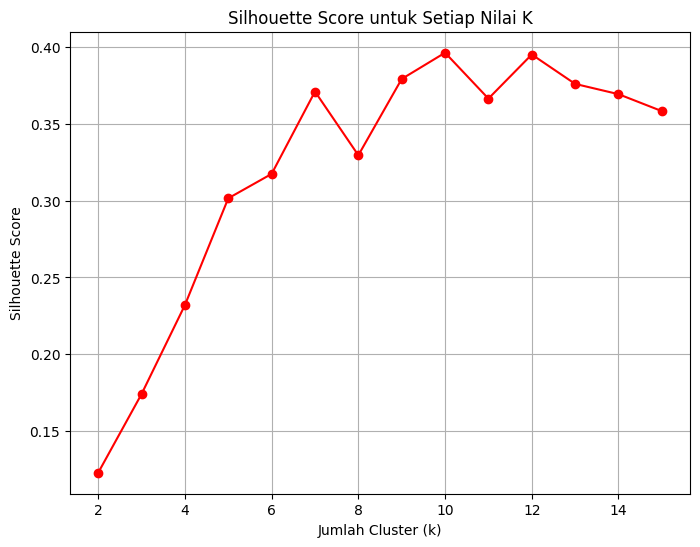


✅ Berdasarkan Silhouette Score, K terbaik adalah: 10

--- Menjalankan K-Means final dengan K=10... ---

Contoh email dari setiap cluster yang ditemukan:

----- CLUSTER 0 -----
- I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times....
- Is that seriously how you spell his name?...

----- CLUSTER 1 -----
- Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat......
- I HAVE A DATE ON SUNDAY WITH WILL!!...

----- CLUSTER 2 -----
- Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged...
- Sorry, I'll call later in meeting....

----- CLUSTER 3 -----
- Even my brother is not like to speak with me. They treat me like aids patent....
- For fear of fainting with the of all that housework you j

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Menemukan K Optimal dengan Silhouette Score
print("\n--- Mencari K Optimal dengan Silhouette Score (Metode Kuantitatif) ---")
K_range = range(2, 16)
silhouette_scores = []
for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    score = silhouette_score(X, kmeans_model.labels_)
    silhouette_scores.append(score)
    print(f"Untuk K = {k}, Silhouette Score-nya adalah {score:.4f}")

# Visualisasikan hasilnya
plt.figure(figsize=(8, 6)) # Ukuran plot disesuaikan
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap Nilai K')
plt.grid(True)
plt.show()

# Jalankan K-Means dengan K Terbaik
# Pilih K yang memberikan Silhouette Score TERTINGGI secara otomatis
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n✅ Berdasarkan Silhouette Score, K terbaik adalah: {optimal_k}")

print(f"\n--- Menjalankan K-Means final dengan K={optimal_k}... ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# Ganti 'df' dengan nama DataFrame yang berisi data bersih Anda
df['cluster'] = kmeans.fit_predict(X)

# Analisis Hasil Cluster ---
print("\nContoh email dari setiap cluster yang ditemukan:")
for i in range(optimal_k):
    print(f"\n----- CLUSTER {i} -----")
    sample_emails = df[df['cluster'] == i]['Text'].head(2).tolist()
    for email_text in sample_emails:
        print(f"- {str(email_text)[:250]}...")

print("\n✅ Proses clustering selesai.")